# Computer vision - Week_07 - Fourier transform

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from scipy import fft
from scipy.signal import find_peaks
from skimage import data, color, transform
from skimage.color import rgb2gray
from scipy.ndimage import binary_dilation

plt.rc({'family' : 'normal', 'wight' : 'normal'})
plt.rcParams['font.size'] = 18
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category= RuntimeWarning)

Fourier Transformation (FT) is an important tool in signal processing used to break down signals into their individual harmonic components. It involves transitioning from the time (or spatial) domain to the frequency domain.

Imagine you have a signal that varies along one dimension, and this signal is composed of two harmonic components. Fourier Transformation allows you to analyze and represent this signal in terms of its constituent frequency components. It reveals how much of each frequency is present in the signal and their respective phases and amplitudes.

In more detail, FT is a mathematical technique that decomposes a complex signal into its fundamental frequency components. These components are sinusoidal waves of different frequencies, and each component has a specific amplitude and phase. FT is widely used in various fields, including image processing, audio analysis, and scientific research, to analyze and manipulate signals in the frequency domain, making it easier to understand and process complex data. The FT process provides insights into the underlying structure and patterns within the signal, making it a fundamental tool in data analysis and transformation.

To better understand this concept, let's begin with an example of using FT on a one-dimensional signal composed of two harmonic components:

## FT  demonstration of signal filtering (1D)
### Generate signal & amply FFT

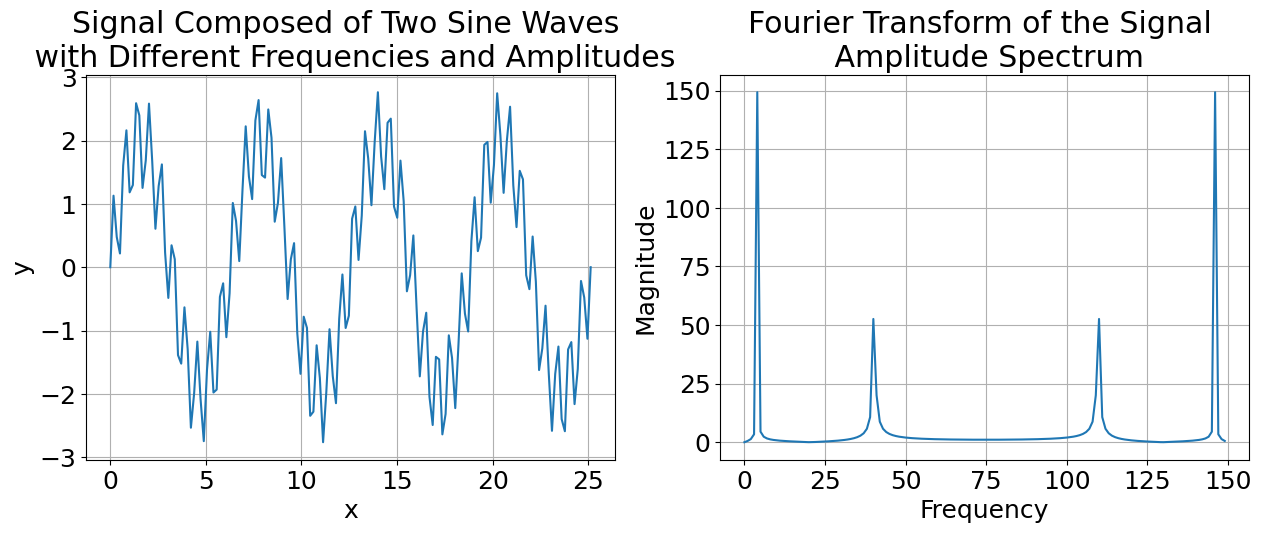

In [2]:
# Generate a time vector from 0 to 8*pi with 150 points
x = np.linspace(0, 8 * np.pi, 150)

# Create two sine waves with different frequencies and amplitudes
y_1 = 2 * np.sin(x)
y_2 = 0.8 * np.sin(10 * x)

# Combine the two sine waves to create a complex signal
y = y_1 + y_2

# Perform the Fourier Transform on the signal
y_f = fft.fft(y)

# Create a figure with two subplots
plt.figure(figsize=(15, 5))

# Subplot 1: Plot the original signal
plt.subplot(121)
plt.title('Signal Composed of Two Sine Waves \n with Different Frequencies and Amplitudes')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.plot(x, y)

# Subplot 2: Plot the magnitude of the Fourier Transform
plt.subplot(122)
plt.title('Fourier Transform of the Signal \n Amplitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()
plt.plot(np.abs(y_f))

plt.show()

The term "magnitude" and "amplitude" are sometimes used interchangeably in the context of Fourier analysis, but there is a distinction:

The **magnitude** of the Fourier Transform represents the absolute value of the complex values resulting from the transform. It reflects the overall strength or intensity of each frequency component in the signal. It does not include phase information.
**Amplitude** specifically refers to the strength or size of a specific harmonic component in a signal. It is a component of the complex number representing that harmonic. Amplitude provides information about how much of that harmonic is present in the signal.


In [3]:
# Find peaks in the magnitude spectrum
peaks, _ = find_peaks(np.abs(y_f))

# Determine the corresponding frequencies of the peaks
# divided by the number of samples
frequencies = peaks * (2 * np.pi / len(y))

# Calculate the amplitudes by dividing the magnitude by the number of data points and multiplying by 2
amplitudes = 2 * np.abs(y_f[peaks]) / len(y)

# Print the detected frequencies and their corresponding amplitudes
for freq, amp in zip(frequencies, amplitudes):
    print(f"Frequency: {freq}, Amplitude: {amp}")

Frequency: 0.16755160819145562, Amplitude: 1.9917220955424304
Frequency: 1.6755160819145563, Amplitude: 0.7014222578654593
Frequency: 4.607669225265029, Amplitude: 0.7014222578654593
Frequency: 6.11563369898813, Amplitude: 1.9917220955424304


The mirrored and duplicated values you're seeing in the magnitude spectrum and amplitude values are a result of the properties of the Discrete Fourier Transform (DFT) for real-valued signals. The DFT output is symmetric, with both positive and negative frequency components, which leads to mirrored and duplicated values in the magnitude and amplitude spectra.

The DFT of a real-valued signal generates a complex output with both positive and negative frequency components. The positive frequencies represent the standard sinusoidal components in the signal, while the negative frequencies are their complex conjugates. Since the magnitude is always real and non-negative, the magnitude of the negative frequency components is the same as the positive frequency components, resulting in mirrored values.

Because the DFT output is symmetric, the amplitudes of the negative frequencies are the same as the positive frequencies. This is why you see duplicated values for the amplitudes.

### Use case: signal filtration

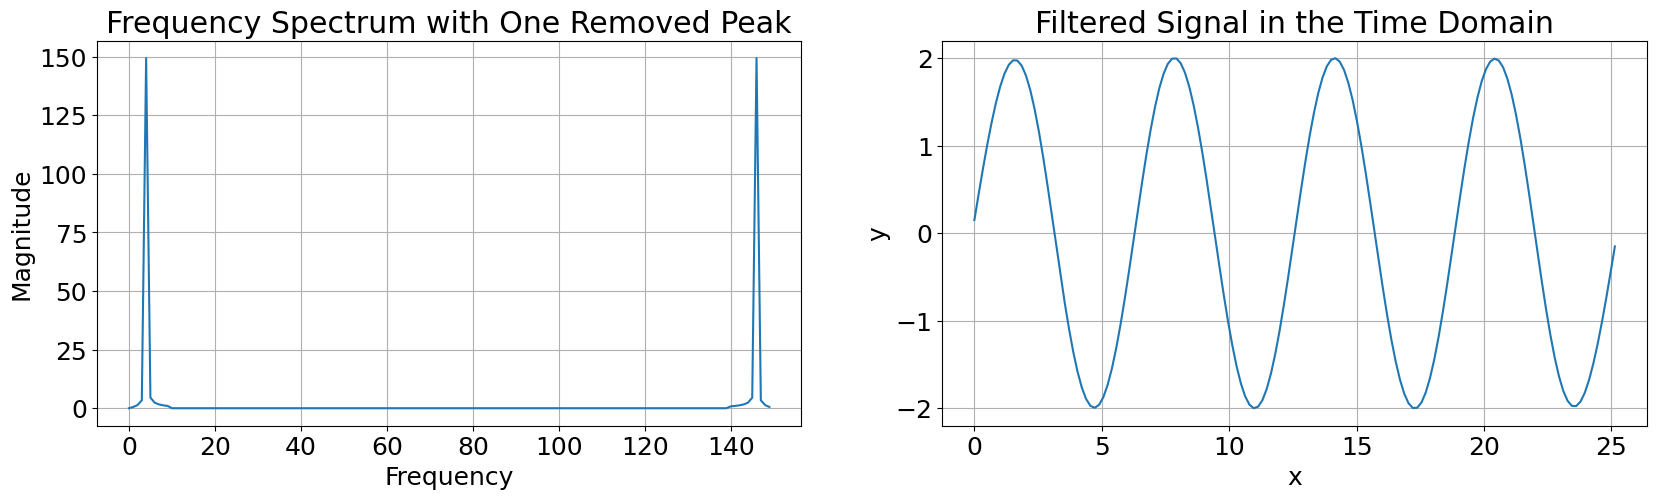

In [4]:
# Create a figure with two subplots
plt.figure(figsize=(20, 5))

# Remove a specific frequency component by setting it to zero
y_f_removed_f = y_f.copy()
y_f_removed_f[10:140] = 0 + 0j

# Subplot 1: Plot the original magnitude spectrum
plt.subplot(121)
plt.title('Frequency Spectrum with One Removed Peak')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()
plt.plot(np.abs(y_f_removed_f))

# Subplot 2: Inverse Fourier Transform of the filtered spectrum
plt.subplot(122)
plt.title('Filtered Signal in the Time Domain')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# Perform the inverse Fourier Transform to obtain the filtered signal
y_t = fft.ifft(y_f_removed_f)

# Plot the filtered signal in the time domain
plt.plot(x, y_t)

plt.show()

### Using frequency (Hertz)

The code demonstrates how to analyze a signal in both the time domain and the frequency domain, providing insights into its frequency components.

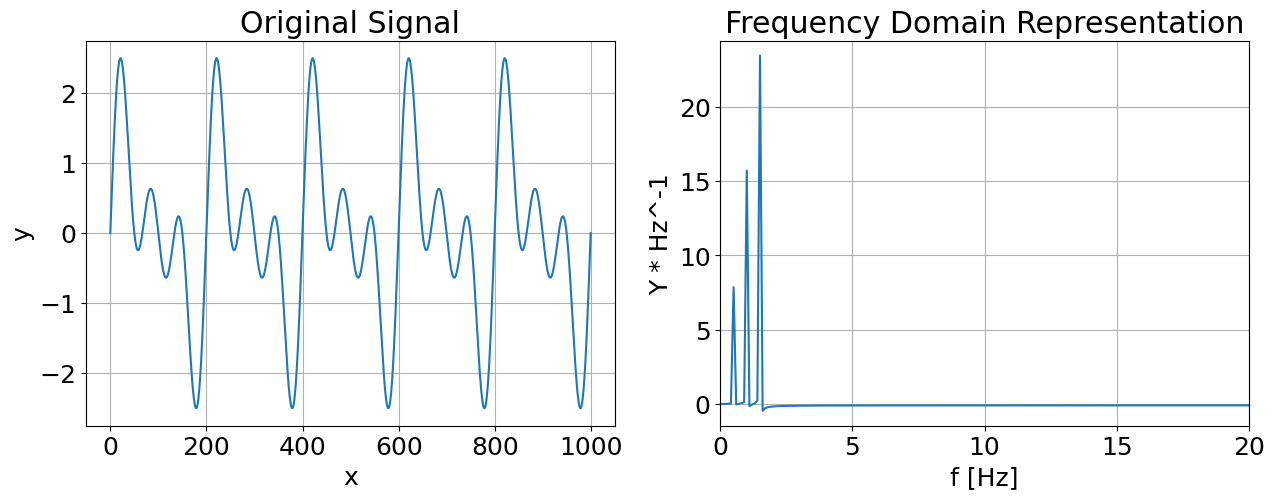

In [12]:
# Define the number of data points and sampling frequency
N = 1000
Fs = 100  # Sampling frequency in Hz
T = N / Fs

# Generate a time vector ranging from 0 to 10*pi with N points
x = np.linspace(0, 10 * np.pi, N)

# Create a signal composed of three sine waves with different frequencies
y_1 = np.sin(x) + np.sin(2 * x) + np.sin(3 * x)

# Calculate the frequency values associated with each data point
f = np.linspace(0, N - 1, N) * Fs / N

# Create a figure with two subplots for visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Plot the original signal in the time domain
plt.subplot(121)
plt.title('Original Signal')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# Compute the Fourier Transform of the signal
y_f = fft.fft(y_1)
plt.plot(y_1)

# Subplot 2: Plot the frequency domain representation
plt.subplot(122)
plt.title('Frequency Domain Representation')
plt.xlabel('f [Hz]')
plt.ylabel('Y * Hz^-1')
plt.grid()

# Plot the real part of the Fourier Transform in the frequency domain
plt.plot(f, np.real(y_f))
plt.axis([0, 20, np.min(np.real(y_f)) - 1, np.max(np.real(y_f)) + 1])

plt.show()

## FT demonstration of signal (2D)
Images also represent signals, but they propagate along two dimensions. Now, using the vector 'y', we will construct a demonstration image. First, we will scale the elements of the 'y' vector to the range <0, 255> and replicate 'y' to obtain a matrix. The result will be an image in which the signal propagates in the horizontal plane, as if we were looking at it from "above."

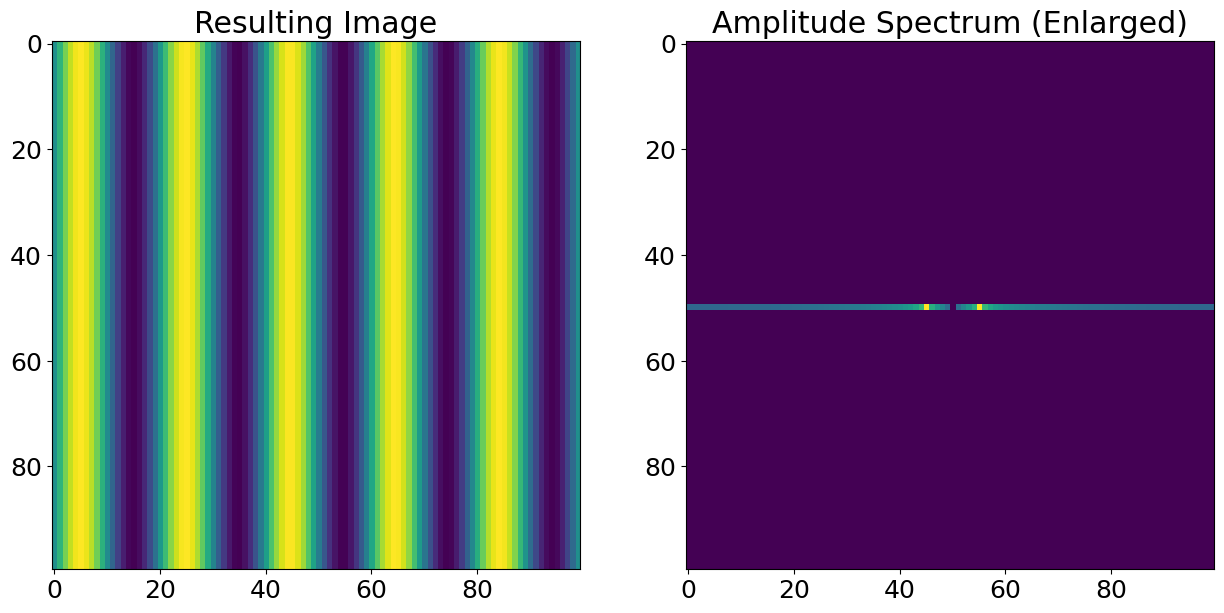

In [13]:
# Define the number of data points
N = 100

# Generate a time vector 'x' with N points, ranging from 0 to 10*pi
x = np.array([np.linspace(0, 10 * np.pi, N)])

# Create a sine wave signal 'y' based on the time vector 'x'
y = np.sin(x)

# Replicate the 'y' signal to form an image-like matrix 'im'
im = np.repeat(y, 100, axis=0)

# Create a figure with two subplots for visualization
plt.figure(figsize=(15, 10))

# Subplot 1: Display the resulting image
plt.subplot(121)
plt.title('Resulting Image')
plt.imshow(im)

# Subplot 2: Display the amplitude spectrum (enlarged)
im_fft = fft.fft2(im)  # Perform 2D Fourier Transform
zero_center_im_fft = fft.fftshift(im_fft)  # Shift the zero frequency component to the center
plt.subplot(122)
plt.title('Amplitude Spectrum (Enlarged)')

# Plot the logarithm of the absolute values of the zero-centered FFT
plt.imshow(np.log(1 + np.abs(zero_center_im_fft)))

### Autonomous task 1

Add a second harmonic element to the signal in the above example and filter it in the frequency domain. Using inverse FT, generate the image using only the first harmonic element (you should get the same image as in the above example).

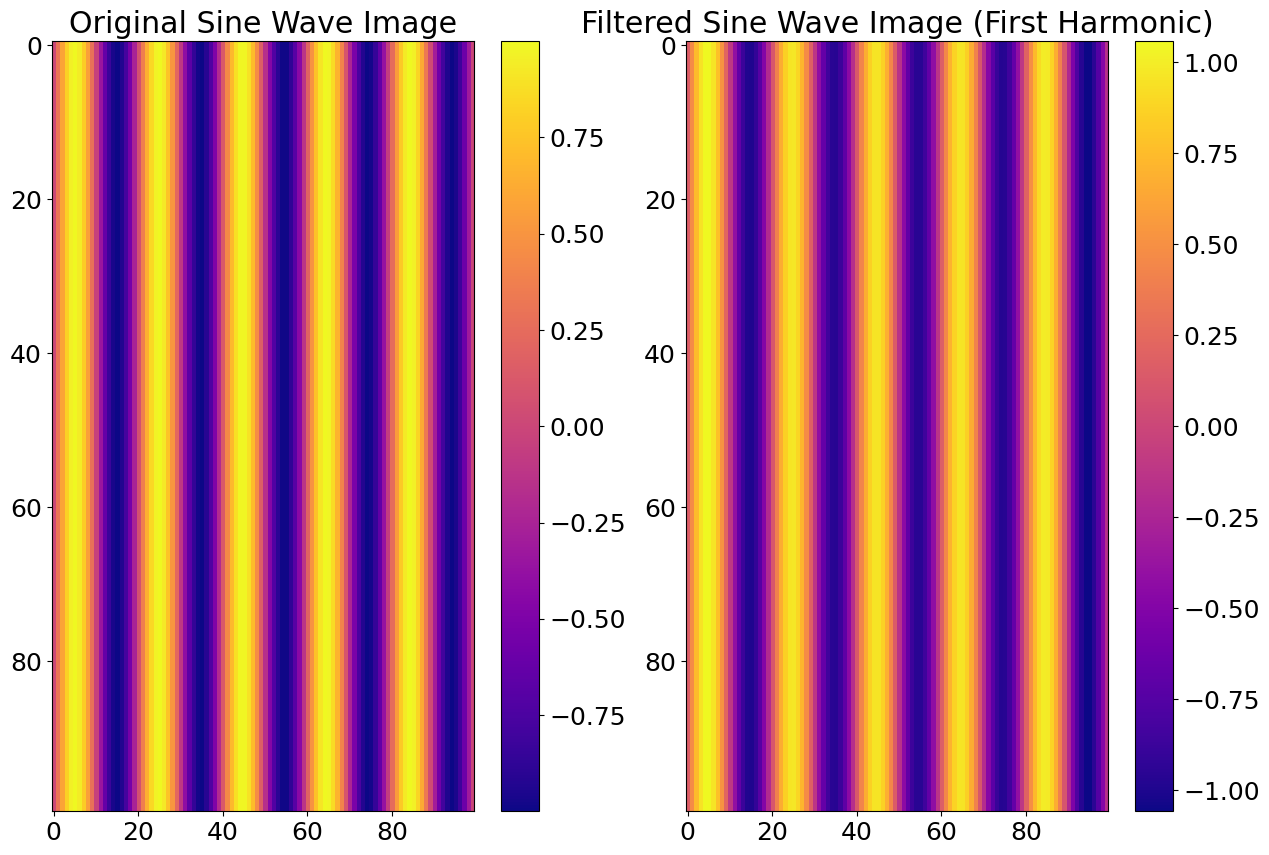

In [21]:
# Define the number of data points
N = 100

# Generate a time vector 'x' with N points, ranging from 0 to 10*pi
x = np.linspace(0, 10 * np.pi, N)

# Create a sine wave signal 'y' based on the time vector 'x'
y = np.sin(x)

# Add a second harmonic element to the signal
y_with_harmonic = y + 0.5 * np.sin(2 * x)

# Compute the Fourier Transform of the new signal
y_ft = np.fft.fft(y_with_harmonic)

# Create a frequency array
frequencies = np.fft.fftfreq(N, (x[1] - x[0]) / (2 * np.pi))

# Filter the frequency domain to keep only the first harmonic
# Setting all frequencies higher than the first harmonic to zero
y_ft_filtered = y_ft.copy()
y_ft_filtered[np.abs(frequencies) > 1] = 0

# Compute the inverse Fourier Transform to get the filtered signal
y_filtered = np.fft.ifft(y_ft_filtered).real

# Replicate the filtered signal to form an image-like matrix
im_filtered = np.repeat(y_filtered[np.newaxis, :], 100, axis=0)

# Replicate the original signal to form an image-like matrix
im_original = np.repeat(y[np.newaxis, :], 100, axis=0)

# Create a figure with two subplots for visualization
plt.figure(figsize=(15, 10))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(im_original, cmap='plasma', aspect='auto')
plt.title('Original Sine Wave Image')
plt.colorbar()

# Plot the filtered image
plt.subplot(1, 2, 2)
plt.imshow(im_filtered, cmap='plasma', aspect='auto')
plt.title('Filtered Sine Wave Image (First Harmonic)')
plt.colorbar()

# Show the plots
plt.show()

## FT of an image (2D)

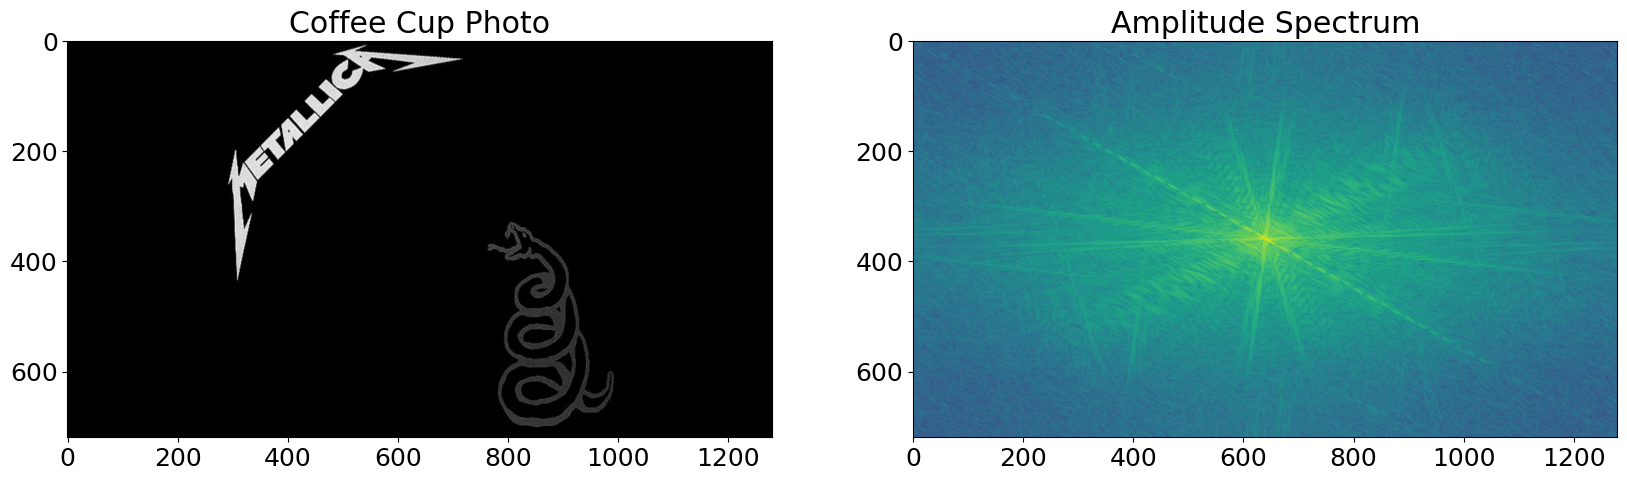

In [25]:
from PIL import Image# Load a color image of a coffee cup and convert it to grayscale
img = Image.open('metallicaO.jpg').convert('L')

# Create a figure with two subplots for
# visualization
plt.figure(figsize=(20, 15))

# Subplot 1: Display the original grayscale image
plt.subplot(121)
plt.title('Coffee Cup Photo')
plt.imshow(img, cmap='gray')

# Subplot 2: Display the amplitude spectrum of the image
img_fft = fft.fft2(img)  # Perform a 2D Fourier Transform on the grayscale image
zero_center_img_fft = fft.fftshift(img_fft)  # Shift the zero frequency component to the center
plt.subplot(122)
plt.title('Amplitude Spectrum')

# Plot the logarithm of the absolute values of the zero-centered FFT
plt.imshow(np.log(1 + np.abs(zero_center_img_fft)))

We can observe that the frequency spectrum is much more complex this time. In the following example, we will attempt to suppress the display of certain periodic frequencies using a simple low-pass filter. Low frequencies typically define slowly changing features that usually characterize the overall shapes of objects. Noise, edges, and details correspond to higher frequencies.

In image processing, low-pass filters are used to emphasize or extract lower-frequency components while attenuating higher-frequency components. These filters are employed to smooth an image, reduce noise, or highlight certain structures and features.

By filtering out high-frequency components, we can create a version of the image that focuses on the smoother and more slowly varying parts, effectively reducing noise and emphasizing the overall shapes and structures. This process is essential in various image processing tasks, including image enhancement, noise reduction, and feature extraction.

(1280, 720)
360 640


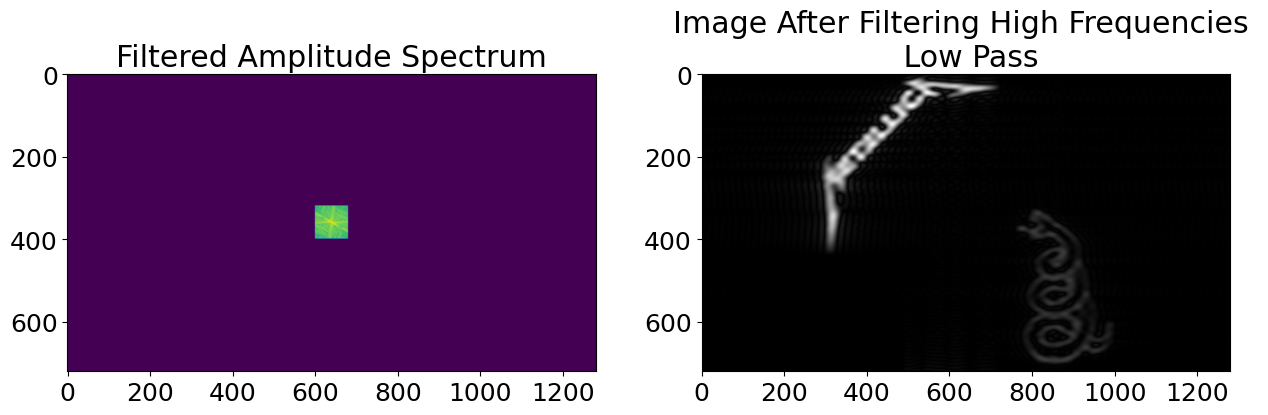

In [37]:
# Define the number of pixels to keep in the filtered spectrum
pixels = 40

# Create a figure for visualization
plt.figure(figsize=(15, 10))

# Subplot 1: Display the filtered amplitude spectrum
plt.subplot(121)
plt.title('Filtered Amplitude Spectrum')

# Perform a 2D Fourier Transform on the grayscale image
img_fft = fft.fft2(img)
zero_center_img_fft = fft.fftshift(img_fft)
img_size = img.size
print(img_size)

# Calculate the center of the frequency domain
center_col, center_row = img_size[0] // 2, img_size[1] // 2
print(center_row, center_col)

# Create an array for the filtered spectrum
filt_spect = np.zeros(zero_center_img_fft.shape, dtype=np.complex128)

# Copy the low-frequency components from the centered spectrum to the filtered spectrum
filt_spect[center_row - pixels:center_row + pixels, center_col - pixels:center_col + pixels] = \
    zero_center_img_fft[center_row - pixels:center_row + pixels, center_col - pixels:center_col + pixels]

# Plot the logarithm of the absolute values of the filtered spectrum
plt.imshow(np.log(1 + np.abs(filt_spect)))

# Subplot 2: Display the image after filtering out high frequencies
plt.subplot(122)
plt.title('Image After Filtering High Frequencies \n Low Pass')

# Perform an inverse 2D Fourier Transform to reconstruct the filtered image
inverse_img = fft.ifft2(fft.ifftshift(filt_spect))

# Plot the absolute values of the inverse image and use a grayscale colormap
plt.imshow(np.abs(inverse_img), cmap='gray')

plt.show()

We can observe that the result is similar to averaging. Along with noise, the texture of objects has also been suppressed, but unwanted blurring of edges has occurred. The result can be optimized by using more targeted filtering. Since the signal propagates in both vertical and horizontal directions, it would be appropriate to reduce only these spectral components. Now, we will try the opposite approach and apply a simplified high-pass filter:

In the previous low-pass filter, low-frequency components were retained, which resulted in the smoothing of the image. However, this also blurred the edges and reduced the fine details. To preserve the edges and fine features, we can use a high-pass filter. High-pass filters emphasize higher-frequency components, such as edges and fine details, while attenuating lower-frequency components. This allows us to focus on the details and edges within the image while reducing noise and blurring. High-pass filtering is commonly used in image processing for tasks like edge detection and feature enhancement.

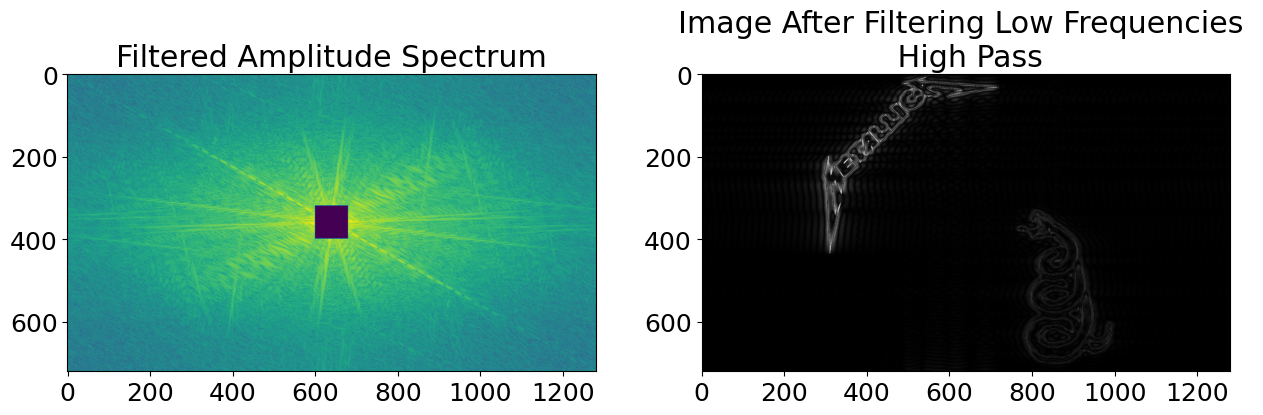

In [36]:
# Define the number of pixels to suppress in the filtered spectrum
pixels = 40

# Create a figure for visualization
plt.figure(figsize=(15, 10))

# Subplot 1: Display the filtered amplitude spectrum
plt.subplot(121)
plt.title('Filtered Amplitude Spectrum')

# Perform a 2D Fourier Transform on the grayscale image
img_fft = fft.fft2(img)
zero_center_img_fft = fft.fftshift(img_fft)
img_size = img.size
filt_spect = zero_center_img_fft

# Set a rectangular region in the frequency domain to zero (high-pass filter)
filt_spect[img_size[1] // 2 - pixels:img_size[1] // 2 + pixels, img_size[0] // 2 - pixels:img_size[0] // 2 + pixels] = 0 + 0j

# Plot the logarithm of the absolute values of the filtered spectrum
plt.imshow(np.log(1 + np.abs(filt_spect)))

# Subplot 2: Display the image after filtering out low frequencies
plt.subplot(122)
plt.title('Image After Filtering Low Frequencies \n High Pass')

# Perform an inverse 2D Fourier Transform to reconstruct the filtered image
inverse_img = fft.ifft2(filt_spect)

# Plot the absolute values of the inverse image using a grayscale colormap
plt.imshow(np.abs(inverse_img), cmap='gray')

This time, the image retains features corresponding to higher harmonic components. One of the key properties of Fourier transformation is that the multiplication of two transformed functions corresponds to their convolution in the spatial domain.

In the context of image processing and Fourier transformation, this means that when we apply a filter in the frequency domain (e.g., high-pass or low-pass filtering), it is equivalent to convolving the filter's spatial representation with the image in the spatial domain. This property is fundamental and powerful because it allows us to manipulate and process images in the frequency domain more effectively, which can lead to various image enhancement and analysis techniques. By selecting and modifying specific frequency components, we can accentuate or suppress certain image features, making Fourier transformation a valuable tool in image processing and analysis.

## Feature finding
A key property of the Fourier transformation is that the multiplication of two transformed functions corresponds to their convolution in the spatial domain. When combined with the Fast Fourier Transform (FFT), this property forms the foundation of fast convolution algorithms. To illustrate this, we will use an example of pattern matching in an image from the Convolution chapter. Let's load the source image and select a pattern:

In image processing, the Fourier transformation is a powerful tool for feature extraction and pattern recognition. It allows us to analyze images in the frequency domain, making it possible to identify specific patterns or features in an image based on their frequency components.

The Fast Fourier Transform (FFT) is an efficient algorithm for computing the Fourier transformation, making it practical for real-time or large-scale image analysis. When we multiply the Fourier transforms of an image and a pattern, the resulting inverse transformation reveals the areas in the image where the pattern matches. This technique is often used in image processing applications like object detection, image recognition, and image registration.

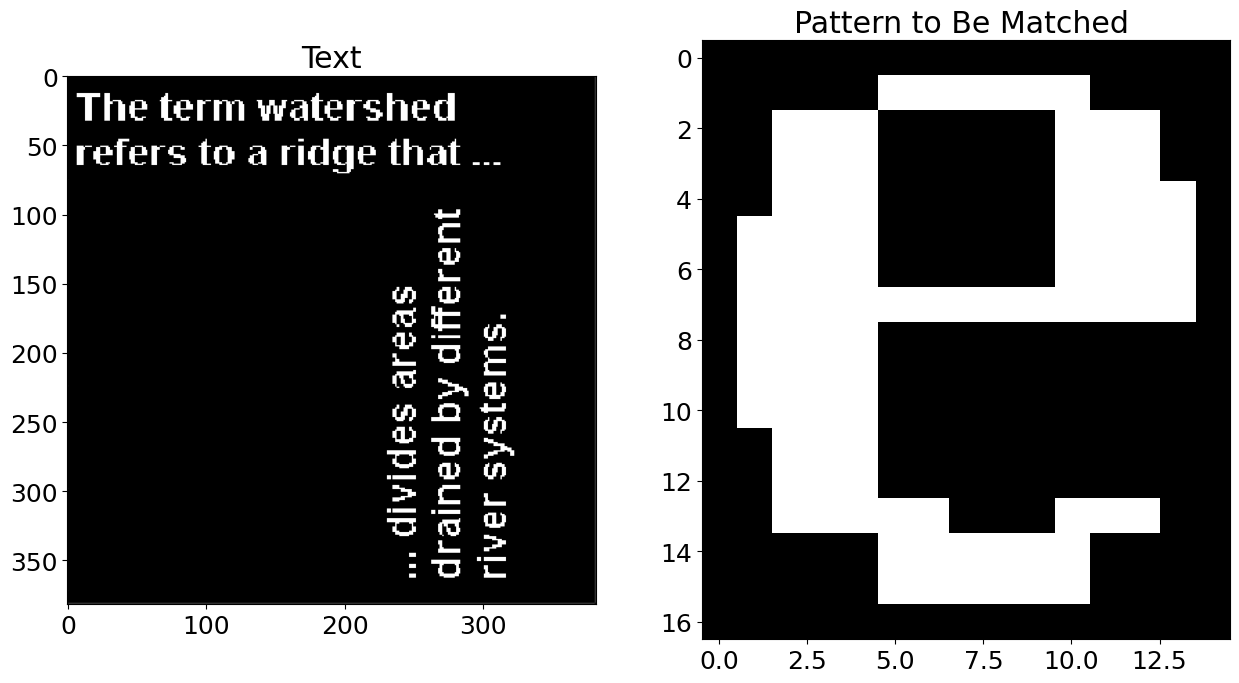

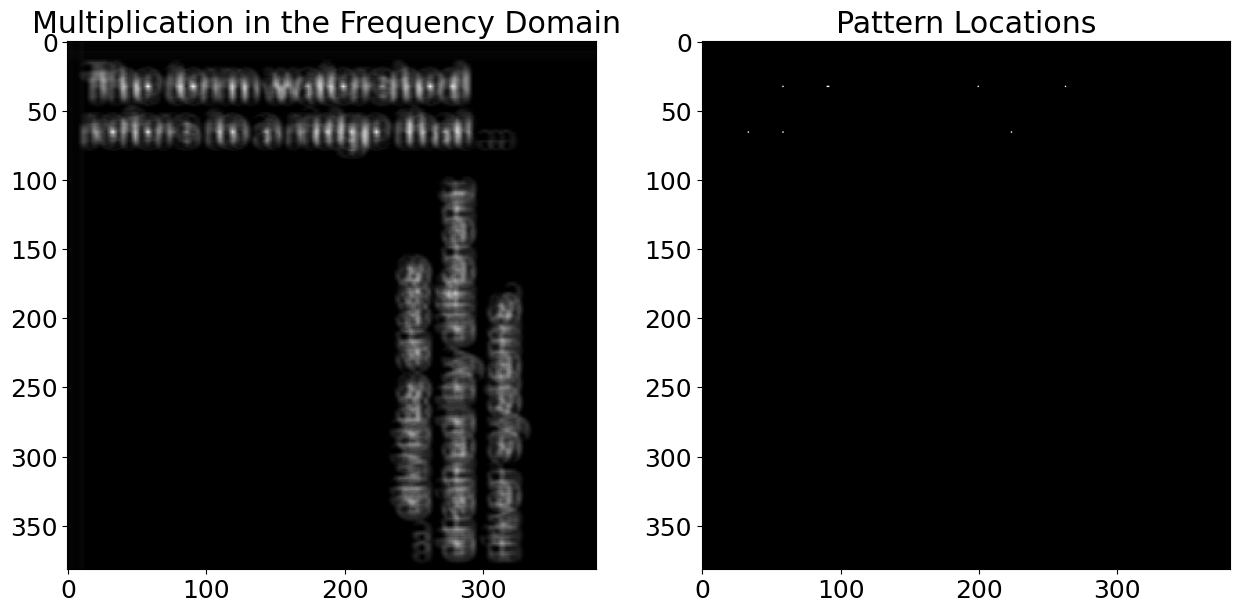

In [38]:
# Load the text image and convert it to grayscale

txt = (rgb2gray(plt.imread("txt.png")[:, :, 0:3]) * 255).astype(dtype=np.uint8)

# Create a figure for visualization
plt.figure(figsize=(15, 10))

# Subplot 1: Display the text image
plt.subplot(121)
plt.title('Text')
plt.imshow(txt, cmap='gray')

# Subplot 2: Display the pattern to be matched
plt.subplot(122)
plt.title('Pattern to Be Matched ')
# Define the kernel by selecting a region of interest in the text image and rotating it
kernel = transform.rotate(txt[17:34, 44:59], 180)
plt.imshow(transform.rotate(kernel, 180), cmap='gray')

# Create a new figure for the demonstration of pattern matching
plt.figure(figsize=(15, 10))

# Subplot 1: Multiply the images in the frequency domain
plt.subplot(121)
plt.title('Multiplication in the Frequency Domain ')
txt_size = txt.shape
# Perform 2D Fourier Transforms of the text image and the rotated kernel, multiply them, and inverse transform
real_txt = np.real(np.fft.ifft2(np.fft.fft2(txt) * np.fft.fft2(kernel, txt_size)))
plt.imshow(real_txt, cmap='gray')

# Subplot 2: Display the locations of the matched pattern
plt.subplot(122)
plt.title('Pattern Locations')
# Threshold the resulting image to identify the positions where the pattern matches
thresh_real_txt = real_txt > 0.89 * np.max(real_txt)
plt.imshow(thresh_real_txt, cmap='gray')


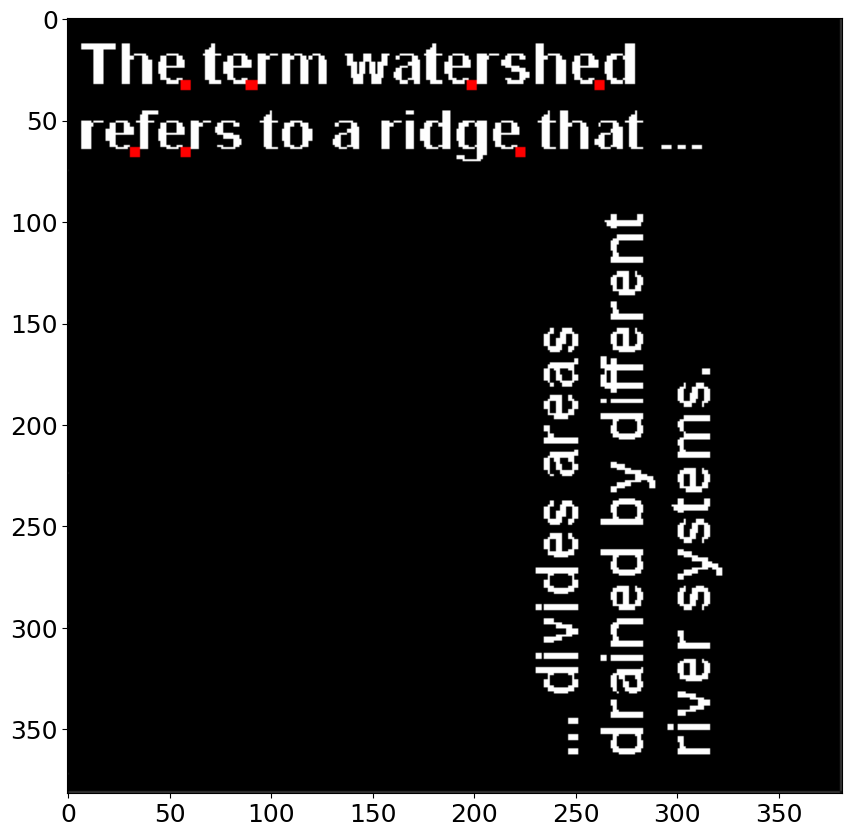

In [22]:


# Perform dilation to increase areas
plt.figure(figsize=(10,30))

dilated_image = binary_dilation(thresh_real_txt, structure=np.ones((5, 5)))
red_mask = np.dstack([dilated_image, np.zeros(thresh_real_txt.shape),np.zeros(thresh_real_txt.shape)])
plt.imshow(red_mask + np.dstack([txt,txt,txt])/255)

### Autonomous work 2

Repeat the pattern detection from the above example using convolution and compare the results (the basis of the needed code can be found in the previous lab's notebook).

## Direction of signal
By analyzing the frequency spectrum, we can determine the dominant directions of signal propagation in an image. This information can be useful, for example, in determining the orientation of objects or text, as well as in image registration. We will demonstrate this using an image of a crane. We will apply frequency spectrum filtering by thresholding, excluding all components whose amplitude is less than 65% of the maximum. After this operation, three predominant directions of signal propagation in the image become evident.

The frequency spectrum represents the image's content in terms of its frequency components. Analyzing the frequency spectrum allows us to identify the main directions in which signals or patterns are prevalent within the image. These dominant directions can be essential for various image processing tasks, such as determining the orientation of objects, recognizing text, or registering (aligning) images. The process involves filtering the frequency spectrum of the image by applying a threshold. All frequency components with amplitudes lower than 65% of the maximum amplitude are excluded. The result of this filtering operation reveals three prominent directions of signal propagation within the image. These directions represent significant patterns or features in the image that are dominant and can be used for various image analysis tasks.

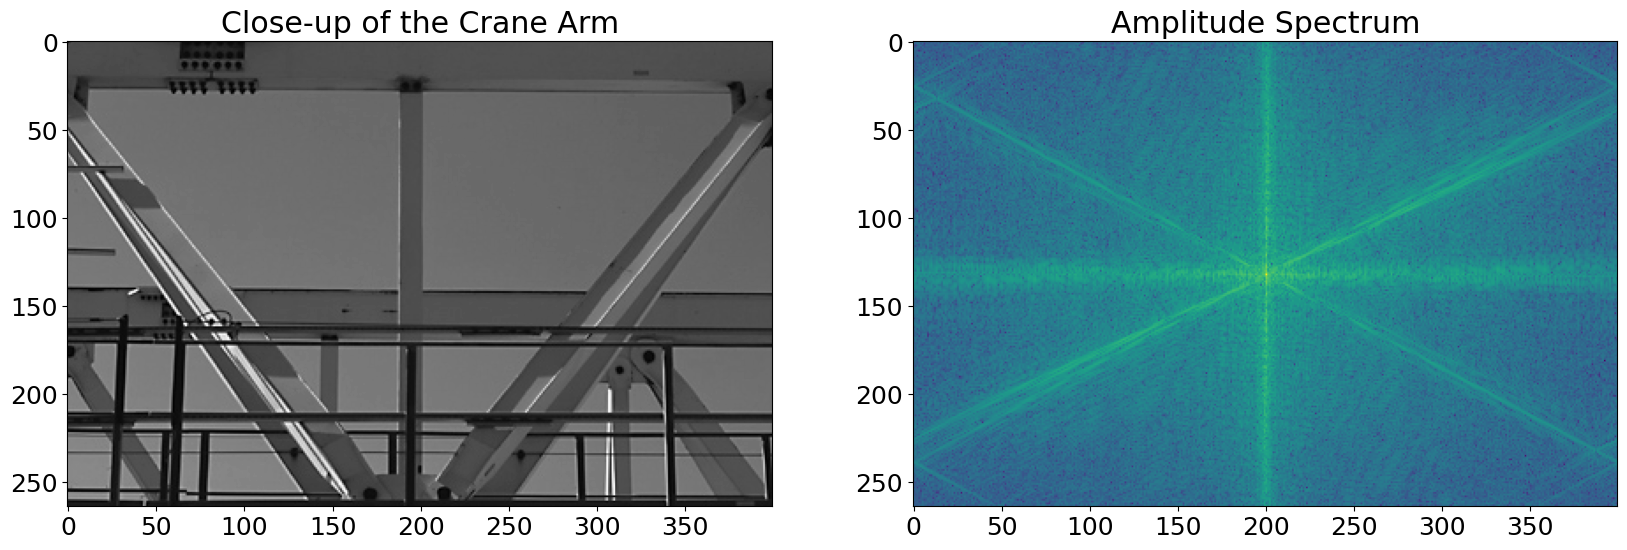

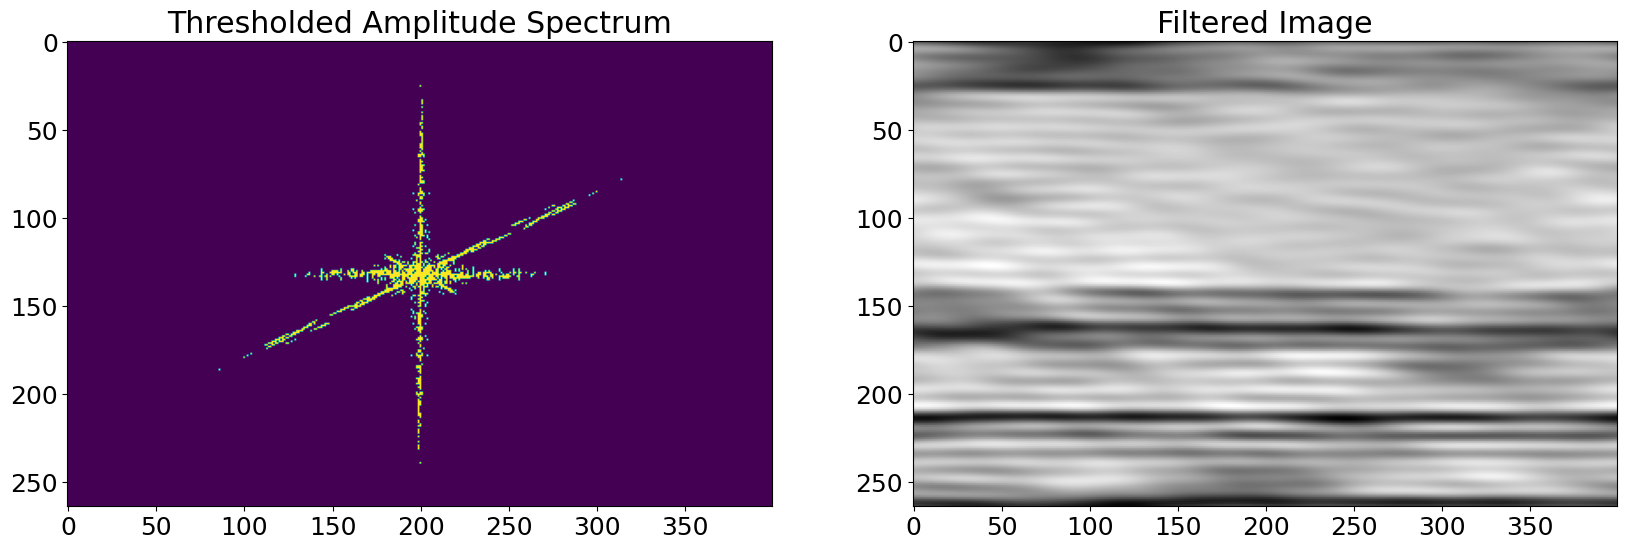

In [26]:
# Load the image of the gantry crane and convert it to grayscale
crane = (rgb2gray(plt.imread("example files/gantrycrane.png")) * 255).astype(dtype=np.uint8)

# Create a figure for displaying the images
plt.figure(figsize=(20, 15))

# Subplot 1: Display the close-up of the crane's arm
plt.subplot(121)
plt.title('Close-up of the Crane Arm')
plt.imshow(crane, cmap='gray')

# Subplot 2: Display the amplitude spectrum of the image
plt.subplot(122)
plt.title('Amplitude Spectrum')
crane_fft = np.fft.fft2(crane)
zct_crane_fft = np.fft.fftshift(crane_fft)
plt.imshow(np.log(1 + np.abs(zct_crane_fft)))

# Create another figure for additional image displays
plt.figure(figsize=(20, 15))

# Subplot 1: Display the thresholded amplitude spectrum
plt.subplot(121)
plt.title('Thresholded Amplitude Spectrum')


# Threshold the amplitude spectrum using a threshold value of 65% of the maximum
thresh = np.log(np.abs(zct_crane_fft)) > (0.65 * np.max(np.max(np.log(np.abs(zct_crane_fft)))))
plt.imshow(thresh)

# Subplot 2: Display the filtered image using a circular filter
plt.subplot(122)
plt.title('Filtered Image')
# Create a circular filter with a specified radius
circ_filter = np.zeros(crane_fft.shape)
rad = 30
s1 = circ_filter.shape[0]
s2 = circ_filter.shape[1]

# Apply the circular filter to the amplitude spectrum
for i in range(0, s1, 1):
    for j in range(0, s2, 1):
        if np.sqrt(np.sum(np.power((i - s1 / 2), 2) - np.power((j - s2 / 2), 2))) < rad:
            circ_filter[i, j] = 1

# Perform filtering in the frequency domain
F3 = zct_crane_fft * thresh * circ_filter
Y = np.fft.ifft2(np.fft.ifftshift(F3))
plt.imshow(np.real(Y), cmap='gray')

### Autonomous work 3

Download the `lunarnasai31m.jpg` image from the example files and remove the periodic signal from it using Fourier transform.

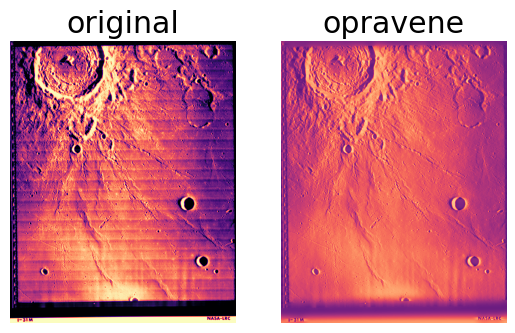

In [41]:
from scipy.ndimage import convolve1d
from scipy.signal import firwin, welch

def remove_lines(image, distortion_freq=None, num_taps=65, eps=0.025):
    image = np.asarray(image, float)
    if distortion_freq is None:
        distortion_freq = estimate_distortion_freq(image)

    hpf = firwin(num_taps, distortion_freq - eps,
                 pass_zero='highpass', fs=1)
    lpf = firwin(num_taps, eps, pass_zero='lowpass', fs=1)
    return image - convolve1d(convolve1d(image, hpf, axis=0), lpf, axis=1)

def estimate_distortion_freq(image, min_frequency=1/25):
    """Estimates distortion frequency as spectral peak in vertical dim."""
    f, pxx = welch(np.reshape(image, (len(image), -1), 'C').sum(axis=1))
    pxx[f < min_frequency] = 0.0
    return f[pxx.argmax()]

img = Image.open('lunarnasai31m.jpg').convert('L')

plt.subplot(121)
plt.title('original')
plt.axis('off')
plt.imshow(img, cmap='magma')

plt.subplot(122)
plt.title('opravene')
plt.axis('off')
plt.imshow(remove_lines(img), cmap='magma')